In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('card_transdata.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.shape

(1000000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

C:\Users\Vaishu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

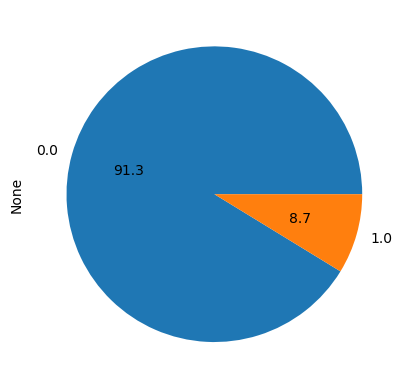

In [18]:
# Class distribution
# Real (class 0.0) meaning non-fraudulent transactions
# Fraud (class 1.0) meaning fraudulent transactions
df.value_counts("fraud").plot.pie(autopct = "%.1f")
df.value_counts("fraud")
df['fraud'].value_counts()/np.float(len(df))

By seeing the pie chart we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed.

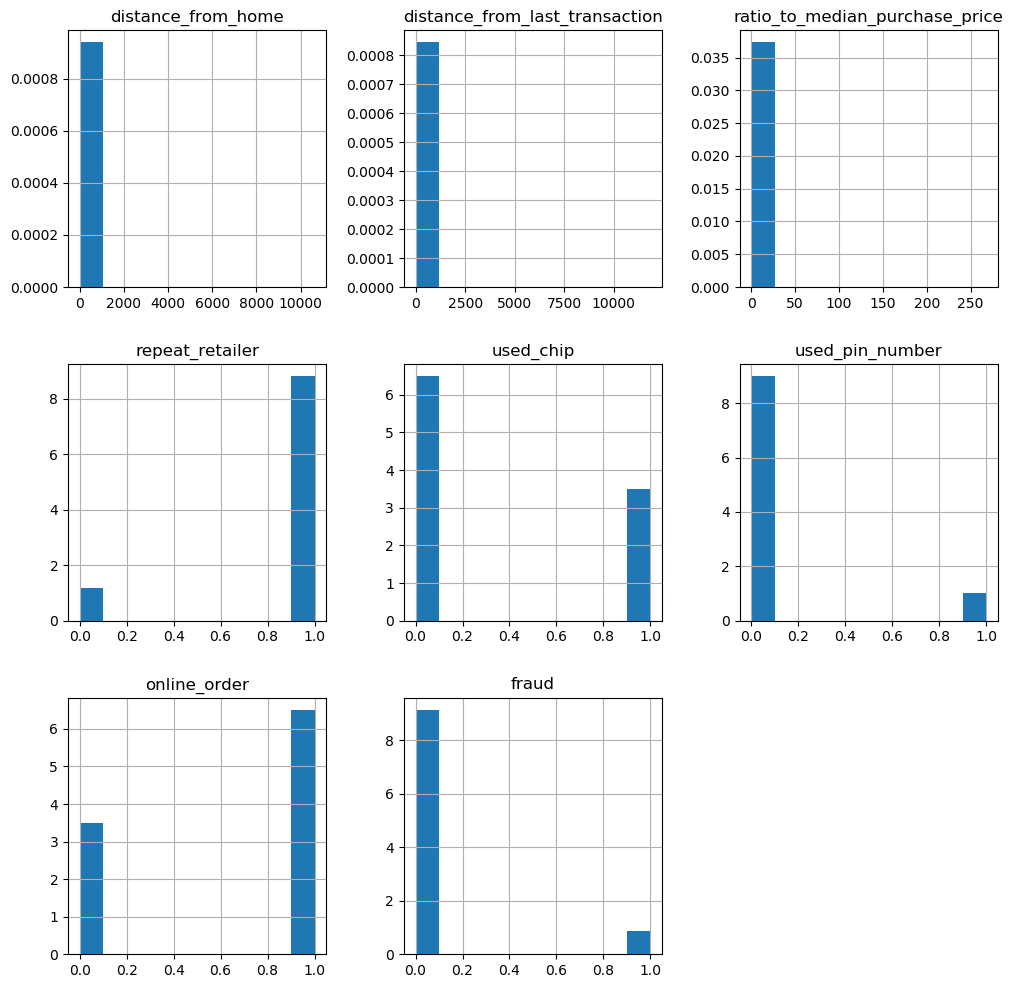

In [11]:
# Check the distribution of Variables
df.hist(bins=10, figsize=(12,12), density=True)
plt.show()

In [13]:
correlation=df.corr()

In [14]:
correlation['fraud'].sort_values(ascending=False)


fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64

When correlation coefficient is to close to +1, it means that there is a strong positive correlation. So we can say "fraud" has highest correlation with "ratio_to_median_purchase_price"

When it is close to -1, it means that there is a strong negative correlation. When it is close to 0, there is no correlation.

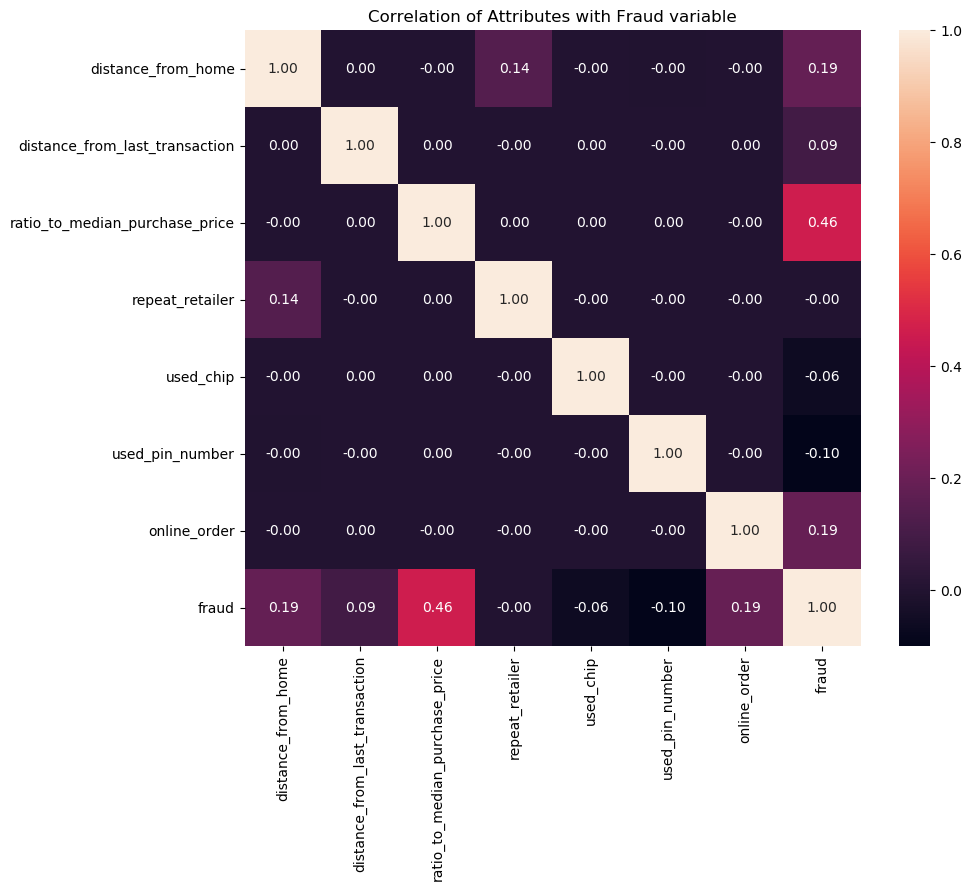

In [17]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Fraud variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()

Under-sampling (Down Sampling)
we implemented "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [20]:
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

# Resampling the original dataset with 87,403 datapoints for both classes
real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)

# Creating new dataset consisting of equal class occurence 
df0 = pd.concat([real_resample, fraud_resample], axis = 0)

fraud
0.0    87403
1.0    87403
dtype: int64

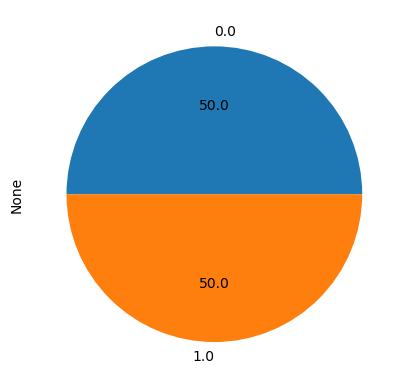

In [21]:
df0.value_counts("fraud").plot.pie(autopct = "%.1f")
df0.value_counts("fraud")

In [22]:
df0.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
263626,5.146370,0.581827,2.020163,1.0,0.0,0.0,1.0,0.0
455906,7.014228,4.098572,0.090274,1.0,0.0,0.0,1.0,0.0
167090,2.488980,1.918921,0.703847,1.0,0.0,0.0,1.0,0.0
943936,12.325551,0.398978,0.328721,1.0,1.0,0.0,1.0,0.0
571244,39.943200,0.086986,1.839616,1.0,0.0,0.0,0.0,0.0


In [23]:
df0.shape
# (1000000, 8)

(174806, 8)

In [24]:
df0.info()
# 61mb to 12mb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174806 entries, 263626 to 180922
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              174806 non-null  float64
 1   distance_from_last_transaction  174806 non-null  float64
 2   ratio_to_median_purchase_price  174806 non-null  float64
 3   repeat_retailer                 174806 non-null  float64
 4   used_chip                       174806 non-null  float64
 5   used_pin_number                 174806 non-null  float64
 6   online_order                    174806 non-null  float64
 7   fraud                           174806 non-null  float64
dtypes: float64(8)
memory usage: 12.0 MB


In [26]:
df0.corr()['fraud'].sort_values(ascending=False)

fraud                             1.000000
ratio_to_median_purchase_price    0.480175
online_order                      0.395379
distance_from_home                0.207645
distance_from_last_transaction    0.116073
repeat_retailer                  -0.001164
used_chip                        -0.111438
used_pin_number                  -0.233344
Name: fraud, dtype: float64

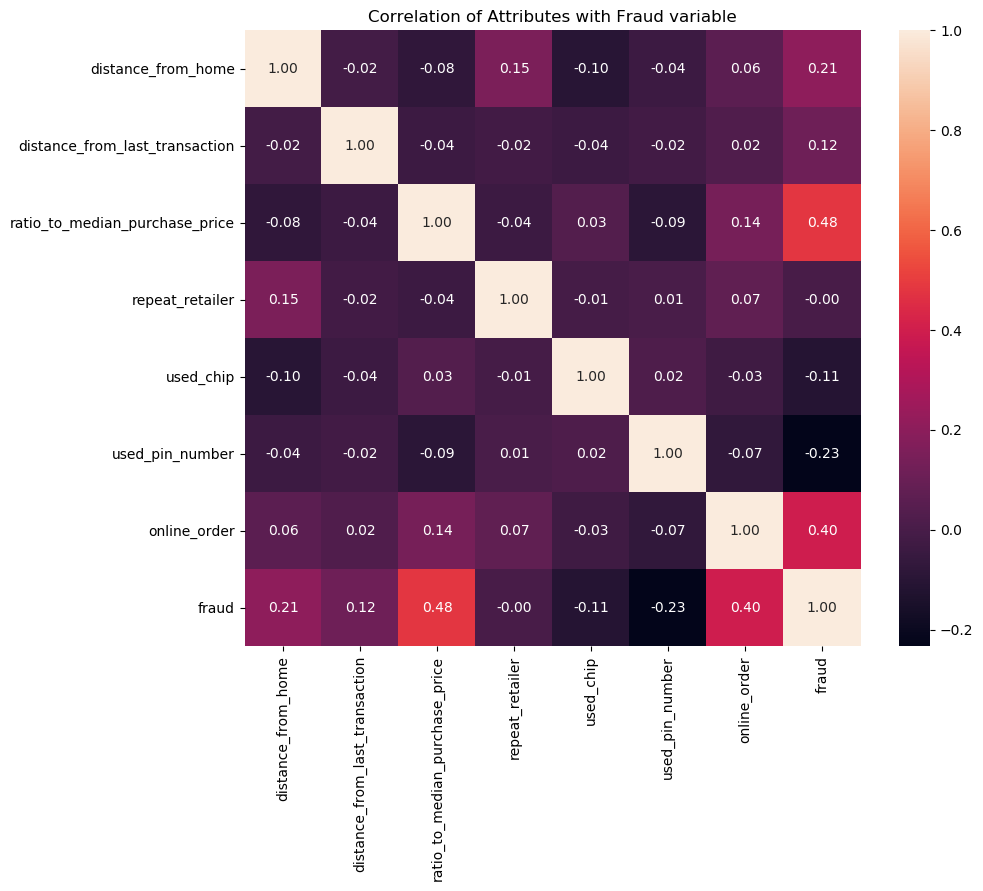

In [27]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Fraud variable')
a = sns.heatmap(df0.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()